# 이미지 생성 모델 개선하기

이번 수업에서 배울 내용은 아래와 같습니다.

1. 언어 모델의 이해
2. 이미지 생성 모델의 이해
3. 사람의 선호도 모델링하기
4. 이미지 생성 모델을 사람의 선호도를 기반으로 개선하기

In [1]:
# 필요한 라이브러리 미리 설치하기
!pip install transformers
!pip install diffusers
!pip install accelerate


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 언어 모델의 이해

In [2]:
from transformers import AutoTokenizer

sample_text = '고양이야옹야옹야옹야옹'
tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")

tokens = tokenizer.tokenize(sample_text)
print(tokens)

token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_to_id_mapping = dict(zip(tokens, token_ids))
print(token_to_id_mapping)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/250k [00:00<?, ?B/s]

['고양이', '##야', '##옹', '##야', '##옹', '##야', '##옹', '##야', '##옹']
{'고양이': 19490, '##야': 4144, '##옹': 5053}


### 이미지 생성 모델 체험하기

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\repry\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\models\attention_processor.py:1584: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(
c:\Users\repry\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\image_processor.py:111: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [2]:
prompt = "moon collisions"

pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

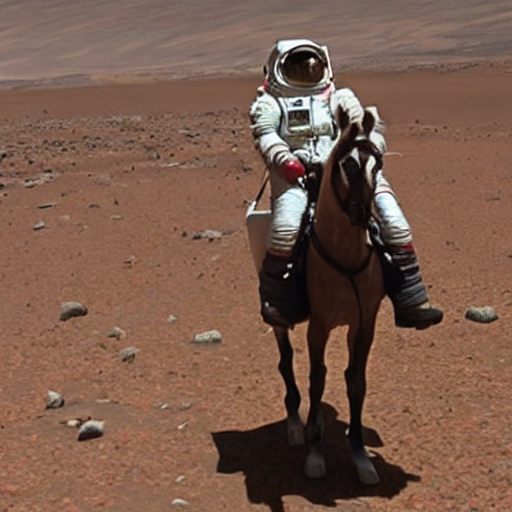

In [3]:
image

In [32]:
%huggingface-cli login

UsageError: Line magic function `%huggingface-cli` not found.


In [31]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

image = pipe(
    "A cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
).images[0]
image

Couldn't connect to the Hub: 401 Client Error. (Request ID: Root=1-6691ed1f-7b802fba3269f6af2ec9a4af;1aba473e-674a-41e6-9c85-f6dfc181af55)

Cannot access gated repo for url https://huggingface.co/api/models/stabilityai/stable-diffusion-3-medium-diffusers.
Access to model stabilityai/stable-diffusion-3-medium-diffusers is restricted. You must be authenticated to access it..
Will try to load from local cache.


OSError: Cannot load model stabilityai/stable-diffusion-3-medium-diffusers: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.